In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv',index_col = 'Id')

In [3]:
df.head(10)

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Id,,,,,
1,NaN,Afghanistan,2020-01-22,0.0,0.0
2,NaN,Afghanistan,2020-01-23,0.0,0.0
3,NaN,Afghanistan,2020-01-24,0.0,0.0
4,NaN,Afghanistan,2020-01-25,0.0,0.0
5,NaN,Afghanistan,2020-01-26,0.0,0.0
6,NaN,Afghanistan,2020-01-27,0.0,0.0
7,NaN,Afghanistan,2020-01-28,0.0,0.0
8,NaN,Afghanistan,2020-01-29,0.0,0.0
9,NaN,Afghanistan,2020-01-30,0.0,0.0


In [4]:
df.rename(columns={"Country_Region": "country", "Province_State": "province"}, inplace=True, errors="raise")
df

,province,country,Date,ConfirmedCases,Fatalities
Id,,,,,
1,NaN,Afghanistan,2020-01-22,0.0,0.0
2,NaN,Afghanistan,2020-01-23,0.0,0.0
3,NaN,Afghanistan,2020-01-24,0.0,0.0
4,NaN,Afghanistan,2020-01-25,0.0,0.0
5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...
35645,NaN,Zimbabwe,2020-04-07,11.0,2.0
35646,NaN,Zimbabwe,2020-04-08,11.0,3.0
35647,NaN,Zimbabwe,2020-04-09,11.0,3.0


In [5]:
df_groupby_country = df.groupby("country")["ConfirmedCases","Fatalities"].sum().sort_values("ConfirmedCases",ascending = False).reset_index()
df_groupby_country

,country,ConfirmedCases,Fatalities
0,US,5135445.0,147545.0
1,China,5096274.0,182450.0
2,Italy,2661341.0,297444.0
3,Spain,2237252.0,200412.0
4,Germany,1728391.0,24491.0
...,...,...,...
179,Papua New Guinea,29.0,0.0
180,Western Sahara,28.0,0.0
181,Sao Tome and Principe,24.0,0.0
182,Timor-Leste,23.0,0.0


In [6]:
df_groupby_country["Recoveries"] = df_groupby_country["ConfirmedCases"] - df_groupby_country["Fatalities"]

In [7]:
df_groupby_country.head(10)

,country,ConfirmedCases,Fatalities,Recoveries
0,US,5135445.0,147545.0,4987900.0
1,China,5096274.0,182450.0,4913824.0
2,Italy,2661341.0,297444.0,2363897.0
3,Spain,2237252.0,200412.0,2036840.0
4,Germany,1728391.0,24491.0,1703900.0
5,France,1476739.0,122427.0,1354312.0
6,Iran,1184893.0,75219.0,1109674.0
7,United Kingdom,749434.0,72805.0,676629.0
8,Turkey,408544.0,8310.0,400234.0
9,Switzerland,393842.0,11029.0,382813.0


In [8]:
df_groupby_country['Survival Rate'] = round(df_groupby_country['Recoveries']/df_groupby_country['ConfirmedCases']*100,2)
df_groupby_country['Fatalities Rate'] = round(df_groupby_country['Fatalities']/df_groupby_country['ConfirmedCases']*100,2)
df_groupby_country.head(10)

,country,ConfirmedCases,Fatalities,Recoveries,Survival Rate,Fatalities Rate
0,US,5135445.0,147545.0,4987900.0,97.13,2.87
1,China,5096274.0,182450.0,4913824.0,96.42,3.58
2,Italy,2661341.0,297444.0,2363897.0,88.82,11.18
3,Spain,2237252.0,200412.0,2036840.0,91.04,8.96
4,Germany,1728391.0,24491.0,1703900.0,98.58,1.42
5,France,1476739.0,122427.0,1354312.0,91.71,8.29
6,Iran,1184893.0,75219.0,1109674.0,93.65,6.35
7,United Kingdom,749434.0,72805.0,676629.0,90.29,9.71
8,Turkey,408544.0,8310.0,400234.0,97.97,2.03
9,Switzerland,393842.0,11029.0,382813.0,97.20,2.80


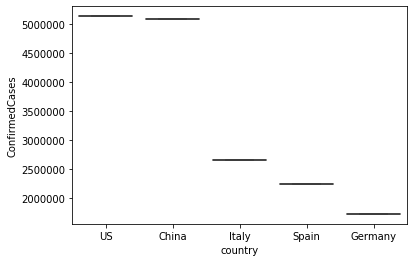

In [9]:
sns.boxplot(x=df_groupby_country.head(5)["country"], y=df_groupby_country.head(5)["ConfirmedCases"])

In [10]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [11]:
pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in c:\users\inzim\anaconda3\lib\site-packages (0.17.3)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [13]:
df_groupby_country.iplot(kind='box')

In [14]:
sns.set_palette('Set2')

In [15]:
df_groupby_country.describe()

,ConfirmedCases,Fatalities,Recoveries,Survival Rate,Fatalities Rate
count,1.840000e+02,184.000000,1.840000e+02,184.000000,184.000000
mean,1.383150e+05,6943.532609,1.313715e+05,96.569891,3.430109
std,6.141391e+05,33315.452596,5.863846e+05,4.398191,4.398191
min,1.700000e+01,0.000000,1.700000e+01,76.190000,0.000000
25%,3.727500e+02,11.500000,3.702500e+02,95.607500,0.487500
50%,5.351000e+03,76.000000,5.209000e+03,98.010000,1.990000
75%,2.943100e+04,623.250000,2.913725e+04,99.512500,4.392500
max,5.135445e+06,297444.000000,4.987900e+06,100.000000,23.810000


In [16]:
df_groupby_country.describe(include=['O'])

,country
count,184
unique,184
top,Cameroon
freq,1


In [17]:
df_groupby_country_10 = df_groupby_country.head(5)

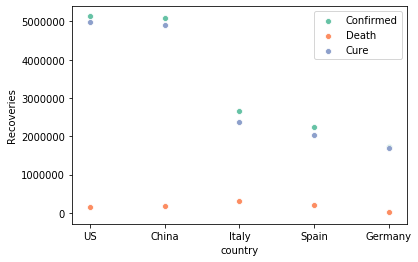

In [18]:
p = sns.scatterplot(data=df_groupby_country_10, x = df_groupby_country_10['country'], y = df_groupby_country_10['ConfirmedCases'], label = 'Confirmed')
p = sns.scatterplot(data=df_groupby_country_10, x = df_groupby_country_10['country'], y = df_groupby_country_10['Fatalities'], label = 'Death')
p = sns.scatterplot(data=df_groupby_country_10, x = df_groupby_country_10['country'], y = df_groupby_country_10['Recoveries'], label = 'Cure')
plt.legend()

In [25]:
fig = px.pie(df_groupby_country.head(20),values="Survival Rate",names="country",title="Survival Rate",template="seaborn")
fig.update_traces(rotation=180, pull=0.05, textinfo='value+label')
fig.show()

In [24]:
fig = px.pie(df_groupby_country.head(20),values="Fatalities Rate",names="country",title="Mortality Rate",template="seaborn")
fig.update_traces(rotation=180, pull=0.05, textinfo='value+label')
fig.show()

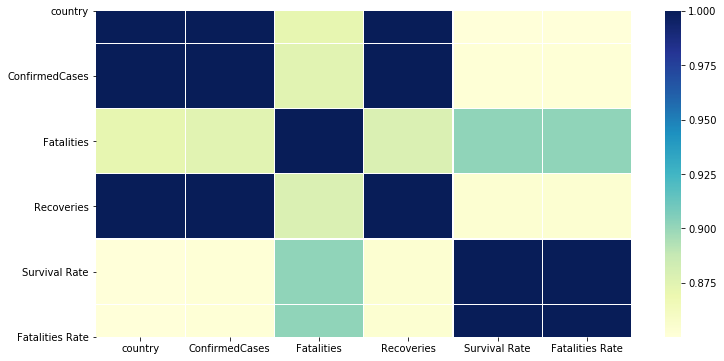

In [21]:
plt.figure(figsize=(12, 6))
corr = df_groupby_country.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

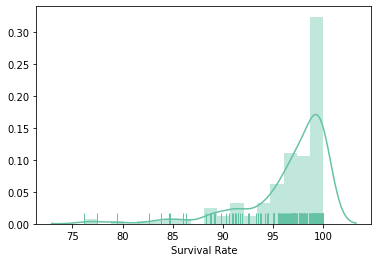

In [33]:
sns.distplot(df_groupby_country['Survival Rate'], rug=True)

plt.show()

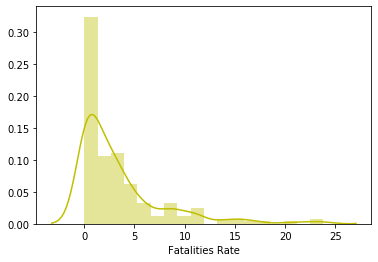

In [34]:
sns.distplot(df_groupby_country['Fatalities Rate'], kde=True, color = 'y')

plt.show()

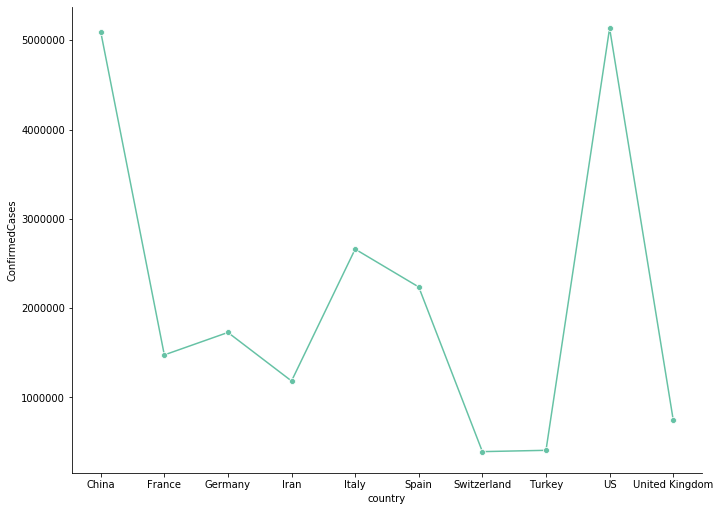

In [47]:
sns.relplot(x='country', y='ConfirmedCases',kind = 'line', data=df_groupby_country.head(10), height = 7.2, aspect = 1.4, marker = 'o')

In [56]:
df_groupby_country['log_value_survival'] = np.log(df_groupby_country['Survival Rate'])
df_groupby_country['log_value_deaths'] = np.log(df_groupby_country['Fatalities Rate'])

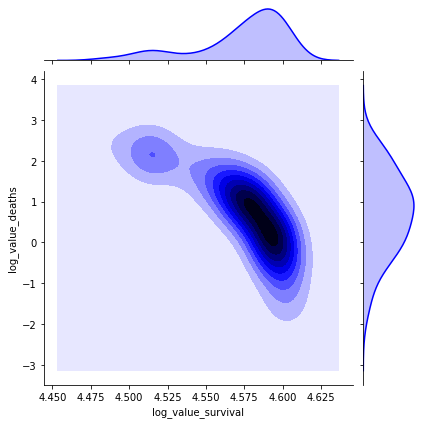

In [58]:
sns.jointplot(x='log_value_survival',y='log_value_deaths',data=df_groupby_country.head(50), kind='kde', color='b')
plt.show()

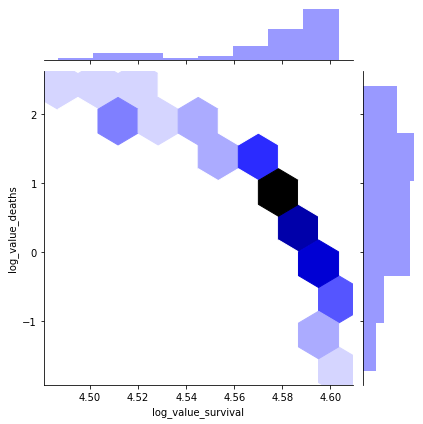

In [59]:
sns.jointplot(x='log_value_survival',y='log_value_deaths',data=df_groupby_country.head(50), kind='hex', color='b')
plt.show()